# Timeseries Spatial Average Demo

This notebook will demonstrate how to call the code to produce timeseries DataSubsets and plots for several different forms of input data requiring different spatial calculations, namely the following:
1. A box (defined by cell coordinates at the corners of the box)
2. A polygon (defined as a shapely Polygon object)
3. Multiple polygons (defined as a shapely MultiPolygon object).

In [11]:
import os
from shapely.geometry import Polygon, MultiPolygon
from clean_air.visualise import dataset_renderer

## Load the data

Define your input data - here we have used some gridded model data. 
Data can be passed to the Timeseries calculator as either a filepath or a DataSubset object.  
Given that the calculator itself makes the conversion to the DataSubset object, we will use a simple filepath.

In [2]:
SAMPLEDIR = "../cap-sample-data"
raw_data_filepath = os.path.join(SAMPLEDIR, "model_full", "aqum_hourly_o3_20200520.nc")

## Scenario 1: Plotting a box

Load the data through Timeseries with spatial average specified.  
Here we have used arbitrary values for coords to use as the corners of the box, and also specified 'box' as the shape we want to use for data processing.

In [3]:
box_data = dataset_renderer.TimeSeries(raw_data_filepath).spatial_average(shape='box', coords=[0, 0, 6000, 8000])

/home/h04/twilson/.conda/envs/cap-notebooks/lib/python3.8/site-packages/iris/coords.py:1979: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'projection_x_coordinate'.
  warnings.warn(msg.format(self.name()))
/home/h04/twilson/.conda/envs/cap-notebooks/lib/python3.8/site-packages/iris/coords.py:1979: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'projection_y_coordinate'.
  warnings.warn(msg.format(self.name()))


We can now plot our Timeseries object.

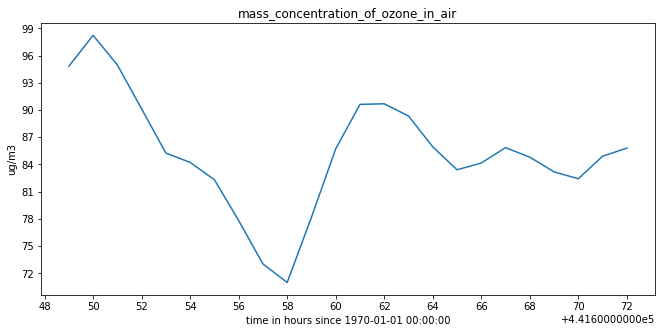

In [4]:
box_plot = dataset_renderer.Renderer(box_data).render()

## Scenario 2: Plotting a polygon

Here we have used arbitrary coordinates as the corners of a very simple Polygon object.

In [5]:
shape = Polygon([(0, 0), (1000, 1000), (1000, 0)])

Now we can pass this shape to the Timeseries calculator to load a subset, as in the previous scenario.

In [6]:
shape_data = dataset_renderer.TimeSeries(raw_data_filepath).spatial_average(shape)

And now we can plot the object.


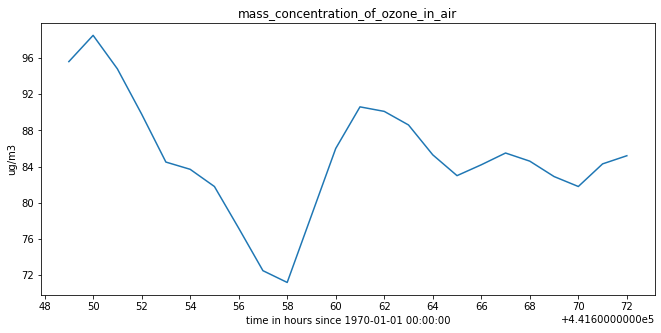

In [7]:
shape_plot = dataset_renderer.Renderer(shape_data).render()

## Scenario 3: Plotting multiple polygons as side-by-side plots 

In this scenario we have input in the form of a shapely MultiPolygon object representing a list of Polygons.  There are a lot of rules about how we define these objects, please see this link for further information:
https://shapely.readthedocs.io/en/stable/manual.html#MultiPolygon

Here we have defined two triangles which do not intersect each other and put them in a list to create a MultiPolygon object.

In [8]:
poly_one = Polygon([(0, 0), (100000, 100000), (100000, 0)])
poly_two = Polygon([(-100000, -100000), (-90000, -90000), (-90000, -10000)])
shapes = MultiPolygon([poly_one, poly_two])

We can use this object in the same way that we do single Polygon objects to extract a list of DataSubsets, and then find the spatial average for each.

In [9]:
shapes_data = dataset_renderer.TimeSeries(raw_data_filepath).spatial_average(shapes)

Once again we can use this to call the plot renderer. This will produce side-by-side plots on the same figure for up to 3 datasets. If more than 3 datasets are submitted then they will be presented as 3 plots per row on the figure.

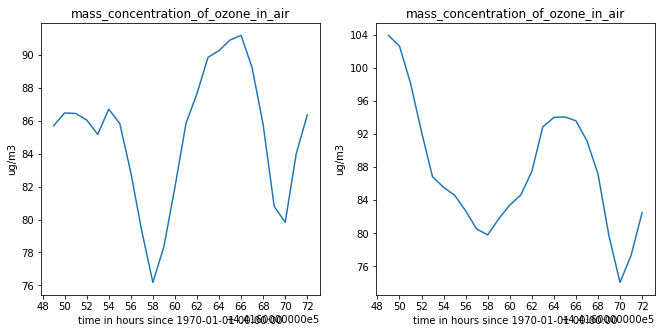

In [10]:
shapes_plot = dataset_renderer.Renderer(shapes_data).render()